# 1. 데이터 가져오기

In [1]:
df = read.csv("Project/pdata/happy_0811.csv")
head(df)

country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,3.0,0.7901894,0.5896119,5.77,6.373,2.298615,4,AS
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,3.1,0.7708637,0.6046841,6.23,6.180,2.406117,4,AS
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,3.2,0.7569276,0.6264676,6.60,5.977,2.539439,4,AS
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,3.3,0.7403437,0.6460586,6.87,5.770,2.656310,4,AS
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,3.4,0.7241509,0.6583662,7.08,5.562,2.745618,4,AS
Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,3.5,0.7100469,0.6780369,7.34,5.359,2.852844,4,AS


#### country, year, country_num, continent 변수 범주화

In [3]:
df$country <- as.factor(df$country)
df$year <- as.factor(df$year)
df$country_num <- as.factor(df$country_num)
df$continent <- as.factor(df$continent)
str(df)

'data.frame':	1890 obs. of  17 variables:
 $ country    : Factor w/ 158 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year       : Factor w/ 16 levels "2005","2006",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ HS         : num  3.72 4.4 4.76 3.83 3.78 ...
 $ log_gdp    : num  7.37 7.54 7.65 7.62 7.71 ...
 $ social     : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ life_exp   : num  50.8 51.2 51.6 51.9 52.2 ...
 $ freedom    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ generosity : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ corruption : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ schooling  : num  3 3.1 3.2 3.3 3.4 3.5 3.5 3.6 3.6 3.8 ...
 $ alcohol    : num  0.79 0.771 0.757 0.74 0.724 ...
 $ suicide    : num  0.59 0.605 0.626 0.646 0.658 ...
 $ obesity    : num  5.77 6.23 6.6 6.87 7.08 7.34 7.34 7.37 7.45 8.5 ...
 $ birth      : num  6.37 6.18 5.98 5.77 5.56 ...
 $ mental     : num

# 2. 회귀식 적합

### fit1 : 변수변환 X 

In [9]:
fit1<-lm(HS ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
          alcohol + suicide + obesity + birth + mental, data=df)
summary(fit1)
# Multiple R-squared:  0.9059,	Adjusted R-squared:  0.8967 


Call:
lm(formula = HS ~ country + log_gdp + social + life_exp + freedom + 
    generosity + corruption + schooling + alcohol + suicide + 
    obesity + birth + mental, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47818 -0.19551 -0.00726  0.19438  1.71028 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -4.527331   0.834277  -5.427 6.56e-08 ***
countryAlbania                   0.262903   0.262645   1.001 0.316976    
countryAlgeria                   0.578172   0.246017   2.350 0.018879 *  
countryAngola                   -1.114499   0.275031  -4.052 5.30e-05 ***
countryArgentina                 0.390172   0.292526   1.334 0.182445    
countryArmenia                   0.098247   0.283188   0.347 0.728683    
countryAustralia                 0.337848   0.396369   0.852 0.394135    
countryAustria                   0.284756   0.373908   0.762 0.446423    
countryAzerbaijan                0.

### boxcox 변환

In [ ]:
## library(car)
bc <- boxCox(fit,lambda=seq(-1,3))
lambda <- bc$x[which.max(bc$y)]  # 최적의 람다 값 찾기(log-likelihood가 최대가 되는 람다값)
lambda # 2.070707

### fit2 : boxcox 결과로 반응변수 변환

In [6]:
fit2<-lm(I((HS^lambda - 1)/lambda) ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
          alcohol + suicide + obesity + birth + mental, data=df)
summary(fit2)
# Multiple R-squared:  0.9206,	Adjusted R-squared:  0.9127 


Call:
lm(formula = I((HS^lambda - 1)/lambda) ~ country + log_gdp + 
    social + life_exp + freedom + generosity + corruption + schooling + 
    alcohol + suicide + obesity + birth + mental, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0294 -1.2291 -0.0709  1.1531  9.5127 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -41.548551   4.811940  -8.634  < 2e-16 ***
countryAlbania                   -0.129703   1.514882  -0.086 0.931779    
countryAlgeria                    2.002082   1.418975   1.411 0.158445    
countryAngola                    -7.617432   1.586325  -4.802 1.71e-06 ***
countryArgentina                  1.620207   1.687232   0.960 0.337051    
countryArmenia                   -0.643377   1.633368  -0.394 0.693707    
countryAustralia                  3.446888   2.286177   1.508 0.131813    
countryAustria                    2.684449   2.156625   1.245 0.213395    
countryAzerba

### fit2 가정 테스트

In [7]:
# 정규성 테스트
shapiro.test(resid(fit2))  

# 등분산성 검정 
library(lmtest)
bptest(fit2) 

# 독립성 검정
dwtest(fit2)

# 세 가정 만족 실패. DW = 1.334


	Shapiro-Wilk normality test

data:  resid(fit2)
W = 0.98595, p-value = 1.191e-12


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  fit2
BP = 397.5, df = 169, p-value < 2.2e-16



	Durbin-Watson test

data:  fit2
DW = 1.334, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


### fit3 : alcohol, suicide, birth만 로그 변환 

In [10]:
fit3<-lm(HS ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
          log(alcohol) + log(suicide) + obesity +log(birth) + mental, data=df)
summary(fit3)
# Multiple R-squared:  0.9065,	Adjusted R-squared:  0.8974 


Call:
lm(formula = HS ~ country + log_gdp + social + life_exp + freedom + 
    generosity + corruption + schooling + log(alcohol) + log(suicide) + 
    obesity + log(birth) + mental, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43392 -0.19456 -0.00676  0.19033  1.70680 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -4.9875288  0.7732292  -6.450 1.45e-10 ***
countryAlbania                   0.5529985  0.2721796   2.032 0.042333 *  
countryAlgeria                   0.5699843  0.2461071   2.316 0.020675 *  
countryAngola                   -1.0774884  0.2855396  -3.774 0.000166 ***
countryArgentina                 0.5952392  0.3132945   1.900 0.057609 .  
countryArmenia                   0.3723177  0.2964011   1.256 0.209240    
countryAustralia                 0.6473421  0.4254996   1.521 0.128351    
countryAustria                   0.7001528  0.4241110   1.651 0.098947 .  
countryAzer

### fit3 boxcox 변환 

[1] 2.070707

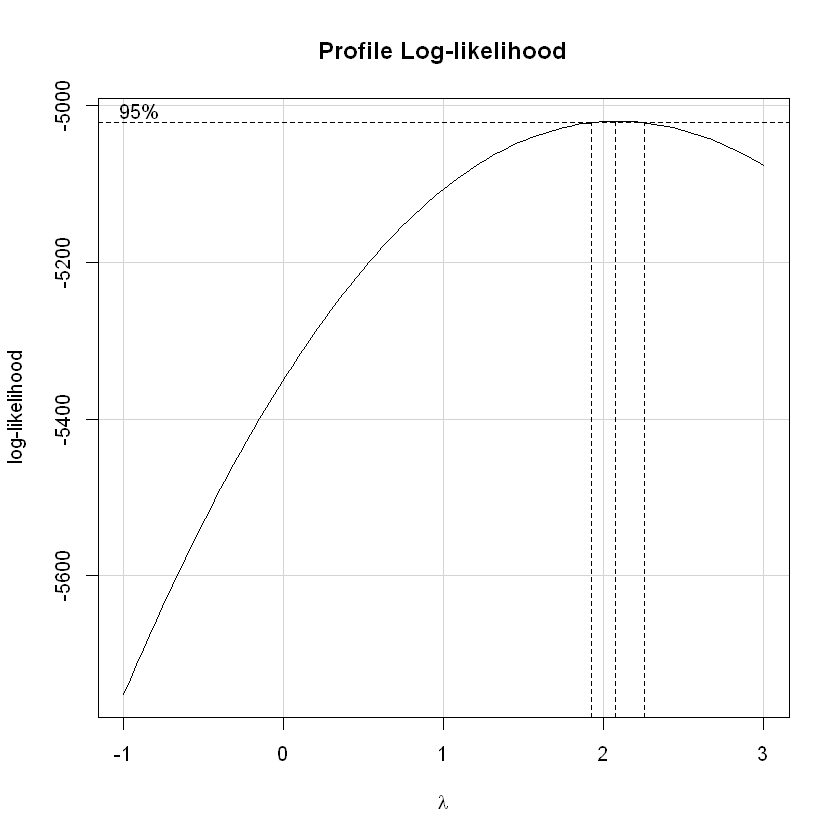

In [11]:
library(car)
bc <- boxCox(fit3,lambda=seq(-1,3))
lambda <- bc$x[which.max(bc$y)]  # 최적의 람다 값 찾기(log-likelihood가 최대가 되는 람다값)
lambda # 2.070707


### fit4 : boxcox 결과로 반응변수 변환 + alcohol, suicide, birth 로그변환

In [12]:
fit4<-lm(I((HS^lambda - 1)/lambda) ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
           log(alcohol) + log(suicide) + obesity + log(birth) + mental, data=df)
summary(fit4)

# Multiple R-squared:  0.921,	Adjusted R-squared:  0.9133  => fit1~ fit4 중 가장 높음 


Call:
lm(formula = I((HS^lambda - 1)/lambda) ~ country + log_gdp + 
    social + life_exp + freedom + generosity + corruption + schooling + 
    log(alcohol) + log(suicide) + obesity + log(birth) + mental, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8954 -1.2220 -0.0859  1.1559  9.9625 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -45.28887    4.46028 -10.154  < 2e-16 ***
countryAlbania                    1.76332    1.57004   1.123 0.261548    
countryAlgeria                    1.94376    1.41964   1.369 0.171117    
countryAngola                    -7.12982    1.64710  -4.329 1.59e-05 ***
countryArgentina                  3.40175    1.80720   1.882 0.059960 .  
countryArmenia                    1.59054    1.70976   0.930 0.352359    
countryAustralia                  5.88059    2.45445   2.396 0.016686 *  
countryAustria                    5.98156    2.44644   2.445 0.014585 *  
co




### fit4 가정 테스트


In [13]:
# 정규성 테스트
shapiro.test(resid(fit4))  

# 등분산성 검정 
library(lmtest)
bptest(fit4) 

# 독립성 검정
dwtest(fit4)

# 세 가정 만족 실패. DW = 1.3465(가장 높음)


	Shapiro-Wilk normality test

data:  resid(fit4)
W = 0.98601, p-value = 1.288e-12



	studentized Breusch-Pagan test

data:  fit4
BP = 393.35, df = 169, p-value < 2.2e-16



	Durbin-Watson test

data:  fit4
DW = 1.3465, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0
